# Keras Regression example

In [1]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt 

Using TensorFlow backend.


## Create some data

We'll create a **X** array with 200 evenly spaced numbers between -1 and 1, randomly shuffled.

In [2]:
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)

X[0:10]

array([-0.41708543, -0.59798995, -0.65829146,  0.02512563,  0.84924623,
        0.98994975, -0.04522613, -0.95979899, -0.70854271,  0.68844221])

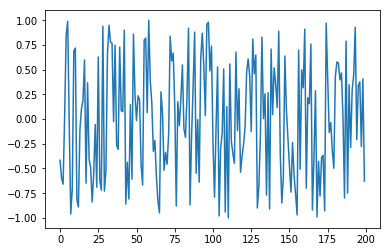

In [3]:
plt.plot(X)

Also, create a **Y** array multiplying X by 0.5 and adding 2 and a _Normal_ random sample between 0 and 0.1 _(the bigger, the sparsest)_.

In [4]:
Y = 0.5 * X + 2 + np.random.normal(0, 0.1, (200, ))

Y[0:5]

array([1.76763955, 1.6669222 , 1.71961369, 2.18647012, 2.4315201 ])

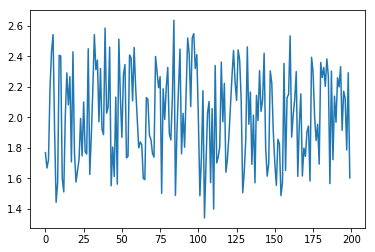

In [5]:
plt.plot(Y)

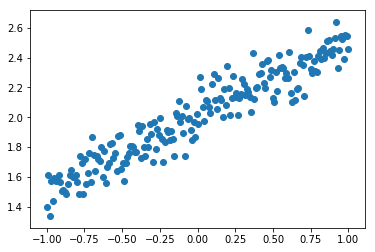

In [6]:
plt.scatter(X, Y)
plt.show()

## Create train/test split

We'll keep 20% of our data to test our trained model.

As we have 200 records, we'll split them into a 160-records training set, and a 40-records testing set.

In [7]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

## Building our Keras classifier

Build a neural network from 1st layer to the last layer

In [8]:
model = Sequential()

model.add(Dense(input_dim=1, units=1)) # adding a dense layer that only has one input and unit

W0927 02:22:08.156157 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 02:22:08.219914 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 02:22:08.224348 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Choose loss function _(**MSE**, Mean Squared Error)_, and optimizing method _(**SGD**, Stochastic Gradient Descent)_.

In [9]:
model.compile(loss='mse', optimizer='sgd')

W0927 02:25:30.278382 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Training our model

In [10]:
n_steps = 600
partial_predictions = []

In [11]:
print('====== Start Training ======')

for step in range(n_steps):
    cost = model.train_on_batch(X_train, Y_train)
    cost = round(float(cost), 3)

    # every 15 steps print partial cost
    if step % 15 == 0:
        print('Train cost at step {}: {}'.format(step, cost))
    
    # every 50 steps save partial prections
    if step % 50 == 0:
        Y_pred = model.predict(X_test)
        pred = ['Step {}, cost: {}'.format(step, cost), Y_pred]
        partial_predictions.append(pred)

====== Start Training ======


W0927 02:26:37.632884 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0927 02:26:37.648392 140550781060096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train cost at step 0: 4.422
Train cost at step 15: 2.518
Train cost at step 30: 1.461
Train cost at step 45: 0.869
Train cost at step 60: 0.533
Train cost at step 75: 0.34
Train cost at step 90: 0.226
Train cost at step 105: 0.157
Train cost at step 120: 0.114
Train cost at step 135: 0.086
Train cost at step 150: 0.067
Train cost at step 165: 0.054
Train cost at step 180: 0.044
Train cost at step 195: 0.037
Train cost at step 210: 0.031
Train cost at step 225: 0.027
Train cost at step 240: 0.023
Train cost at step 255: 0.021
Train cost at step 270: 0.018
Train cost at step 285: 0.017
Train cost at step 300: 0.015
Train cost at step 315: 0.014
Train cost at step 330: 0.013
Train cost at step 345: 0.012
Train cost at step 360: 0.012
Train cost at step 375: 0.011
Train cost at step 390: 0.011
Train cost at step 405: 0.01
Train cost at step 420: 0.01
Train cost at step 435: 0.01
Train cost at step 450: 0.01
Train cost at step 465: 0.01
Train cost at step 480: 0.009
Train cost at step 495: 

### Test our model

In [12]:
print('====== Start Testing ======')

cost = model.evaluate(X_test, Y_test, batch_size=40)
cost = round(float(cost), 3)

print('Test cost: {}'.format(cost))

====== Start Testing ======
40/40 [==============================] - 0s 430us/step
Test cost: 0.011


Get Weight/bias from any layer:

In [13]:
W, b = model.layers[0].get_weights()

print('Weights=', W, '\nbiases=', b)

Weights= [[0.53130746]] 
biases= [2.005548]


## Plotting results

In [14]:
def plotPredictions(pred):
    title, Y_pred = pred
    
    plt.title(title)
    
    plt.scatter(X_test, Y_test)
    plt.plot(X_test, Y_pred, color='#ff7e0f')

    plt.xticks([])
    plt.yticks([])
    #ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)

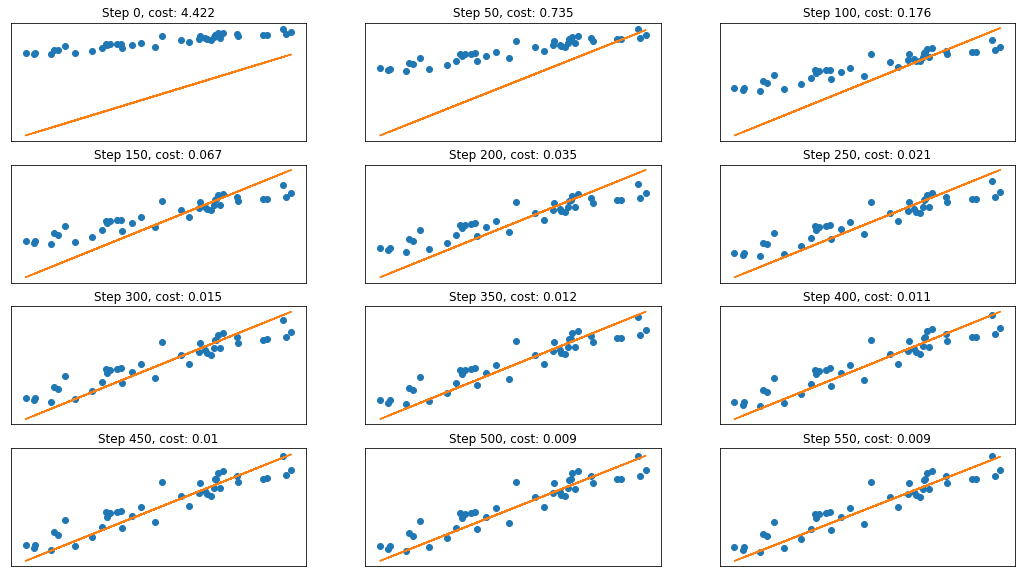

In [15]:
plots_count = len(partial_predictions)

plt.figure(figsize=(18, 10))

for i in range(plots_count):
    plt.subplot(plots_count/3, 3, i+1)
    plotPredictions(partial_predictions[i])